In [110]:
# import openai
# import time 
import matplotlib.pyplot as plt
import numpy as np
# import json
import pandas as pd
# import re
# %matplotlib inlinew2v_model
# from rake_nltk import Rake
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
# import seaborn as sns
# sns.set_style("darkgrid")

# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import spacy
# import gensim
# from collections import defaultdict
# from tqdm import tqdm
from sklearn.manifold import TSNE

In [111]:
ngram_abstracts = np.load("ngram_abstracts.npy", mmap_mode="r")
# 
concept_arr = np.load("overlapping_concepts.npy")
year_arr = np.load("year_arr.npy", mmap_mode="r")
month_arr = np.load("month_arr.npy", mmap_mode="r")

In [112]:
df_ab = pd.DataFrame(data=ngram_abstracts,    # values
                columns=["ab"])  # 1st row as the column names
df_ab["year"] = year_arr
df_ab["month_arr"] = month_arr


In [113]:




# w2v_model.build_vocab(ngram_abstracts, progress_per=10000,update=True)
# w2v_model.train(ngram_abstracts, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
# vec_1 = w2v_model.wv.get_vector(concept_arr[:,0][0])
# w2v_model.save("w2v_model_trained_stop_1.model")



In [114]:
cores = multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=10,
                     window=8,
                     vector_size=200,
                     sample=1e-4, 
                     alpha=0.01, 
                     min_alpha= 0.0001, 
                     negative=15,
                     workers=cores-1)

w2v_model.build_vocab([ab.split() for ab in df_ab[df_ab['year'] == int(1994)]["ab"].to_numpy()])
for year in np.unique(year_arr)[1:]:
   
    ngram_abstracts_year = [ab.split() for ab in df_ab[df_ab['year'] == int(year)]["ab"].to_numpy()]

    w2v_model.build_vocab(ngram_abstracts_year, progress_per=10000,update=True)
    w2v_model.train(ngram_abstracts_year, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
    w2v_model.save("model_year_{}.model".format(year))


In [129]:
from gensim import models
concept_encoding_arr = []
for year in np.unique(year_arr)[1:]:

    loaded_w2v = Word2Vec.load("model_year_{}.model".format(year))
    c_dict = {}
    for c in concept_arr:
        try:
            c_dict[c]=loaded_w2v.wv.get_vector(c)
        except:
            pass
    concept_encoding_arr.append(c_dict)
concept_encoding_arr = np.array(concept_encoding_arr)

In [ ]:
concept_encoding_arr[0]["schroding_equation"]

In [134]:
track_vec_bell_inequality = np.array([concept_encoding_arr[i]["bell_inequality"] for i in range(len(np.unique(year_arr)[1:]))])
track_vec_schroding_equation = np.array([concept_encoding_arr[i]["schroding_equation"] for i in range(len(np.unique(year_arr)[1:]))])

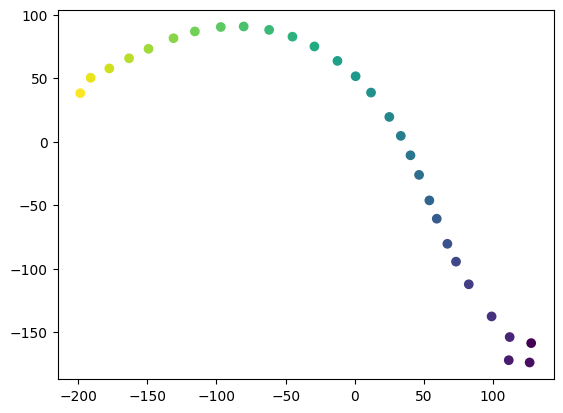

In [143]:
TSNE_bell_inequality = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit(track_vec_bell_inequality)

X_bell_inequality = TSNE_bell_inequality.transform


plt.scatter(X_bell_inequality[:,0],X_bell_inequality[:,1],c=np.unique(year_arr)[1:])
